<a href="https://colab.research.google.com/github/AndreVelasques7/inteligencia_computacional/blob/main/ed-09/kmenas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving archive(1).zip to archive(1).zip


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pontuação Silhouette: 0.19


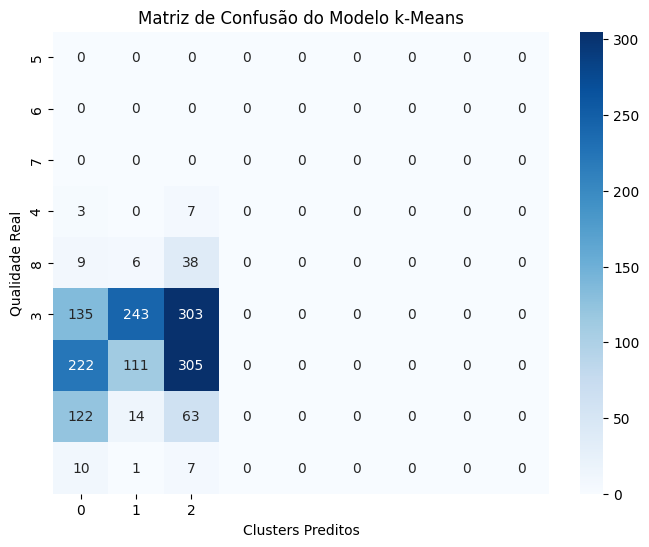

In [1]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from google.colab import files

# Carregamento do Arquivo
arquivos_upload = files.upload()
arquivo_dados = list(arquivos_upload.keys())[0]

# Leitura e Processamento dos Dados
dados_vinhos = pd.read_csv(arquivo_dados)

# Verificação de Dados Ausentes
if dados_vinhos.isnull().any().any():
    print("Detectados valores ausentes no dataset.")
    # Aqui, insira o código para tratamento de dados ausentes, se necessário.

# Normalização dos Atributos
normalizador = StandardScaler()
atributos_normalizados = normalizador.fit_transform(dados_vinhos.drop('quality', axis=1))

# Clusterização com k-Means
modelo_kmeans = KMeans(n_clusters=3, random_state=42)
clusters_identificados = modelo_kmeans.fit_predict(atributos_normalizados)

# Adicionando Rótulos dos Clusters ao Dataset
dados_vinhos['rotulo_cluster'] = clusters_identificados

# Avaliação com Silhouette Score
pontuacao_silhouette = silhouette_score(atributos_normalizados, clusters_identificados)
print(f"Pontuação Silhouette: {pontuacao_silhouette:.2f}")

# Matriz de Confusão
matriz_confusao = confusion_matrix(dados_vinhos['quality'], clusters_identificados)

# Visualização da Matriz de Confusão
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=dados_vinhos['quality'].unique())
plt.title('Matriz de Confusão do Modelo k-Means')
plt.xlabel('Clusters Preditos')
plt.ylabel('Qualidade Real')
plt.show()
